# Calgary Community Boundaries

It will be useful to describe the Calgary Business License data with respect to an actual map of Calgary that we can plot on and manipulate. The business license data has the geographical locations of the business in longitude and latitude. By downloading the shapefile* (eg. the map) from https://data.calgary.ca/ we can draw Calgary's communities using _Geopandas_ and create an easy and interpretable user graphic that describes the business license data.

In [2]:
# import geopandas and import the shapefile (.shp)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [3]:
map_df = gpd.read_file('dat/Calgary_Community_Boundaries/geo_export_98191e70-c41b-4550-8551-d9977b2f1bde.shp')
map_df.head()

,class,class_code,comm_code,comm_struc,name,sector,srg,geometry
0,Residential,1.0,SNA,INNER CITY,SUNALTA,CENTRE,BUILT-OUT,"POLYGON ((-114.10061493005 51.047994301993, -1..."
1,Residential,1.0,WSP,BUILDING OUT,WEST SPRINGS,WEST,DEVELOPING,"POLYGON ((-114.187805990867 51.061506344418, -..."
2,Residual Sub Area,4.0,12A,OTHER,12A,SOUTHEAST,N/A,"POLYGON ((-113.869446537594 50.979572332142, -..."
3,Residential,1.0,WND,1950s,WINDSOR PARK,CENTRE,BUILT-OUT,"POLYGON ((-114.081517547811 51.008716296692, -..."
4,Residential,1.0,WAL,BUILDING OUT,WALDEN,SOUTH,DEVELOPING,"POLYGON ((-114.01032391161 50.868149357409, -1..."


Variable Description:

- 'class': CATEGORICAL, {Residential, Residual Sub area, Major Park, Industrial}
- 'class_code': shorthand for 'class'
- 'comm_code': shorthand for 'name'
- 'comm_struc': CATEGORICAL, {1950s, 1960s/1970s, 1980s/1990s, 2000s, EMPLOYMENT, UNDEVELOPED, BUILDING OUT, INNER CITY, CENTRE CITY, PARKS, OTHER}
- 'name': CATEGORICAL, {all Calgary sector names}
- 'srg': CATEGORICAL, {BUILT-OUT, DEVELOPING, N/A}
- 'geometry': POLYGON OBJECT of 'name' coordinates

Plot 4 maps in a quadrant:

- Plot 1: By sector  (Centre, West, South, etc.)  
- Plot 2: By class (Residential, Residual Sub Area, Industrial, Major Park)
- Plot 3: By 'srg' (Built Out, Developing, N/A)
- Plot 4: By 'comm_struc' or community structure:

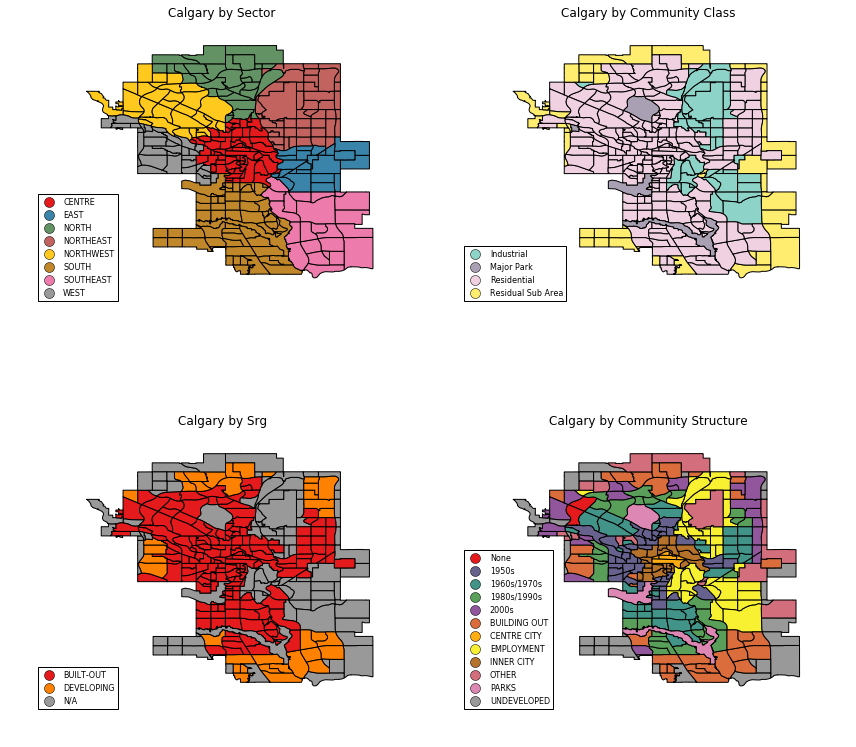

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
# Plot 1
map_df.plot(column = 'sector', ax = axes[0,0], legend = True, legend_kwds = {'loc':3,'fontsize':8})
axes[0,0].set_title('Calgary by Sector')
# Plot 2
map_df.plot(column = 'class', ax = axes[0,1], legend = True, legend_kwds = {'loc':3,'fontsize':8},cmap='Set3')
axes[0,1].set_title('Calgary by Community Class')
# Plot 3
map_df.plot(column = 'srg', ax = axes[1,0], legend = True, legend_kwds = {'loc':3,'fontsize':8},cmap='Set1')
axes[1,0].set_title('Calgary by Srg')
# Plot 4
map_df.plot(column = 'comm_struc', ax = axes[1,1], legend = True, legend_kwds = {'loc':3,'fontsize':8},cmap='Set1')
axes[1,1].set_title('Calgary by Community Structure')

# Tighten plots.
plt.tight_layout()
plt.subplots_adjust()

# Turn off the axes.
for ax_ in axes:
    for ax in ax_:
        ax.axis('off')
        
# Save fig.
savestring = 'community_boundaries_by_variable.png'
plt.savefig('figs/' + savestring)

Let's import the business license transactions and place them overtop of a black-and-white map. A heatmap or density plot may be useful to see the number in each area.

In [5]:
lic = pd.read_csv('dat/Calgary_Business_Licences.csv')
lic.head()

,TRADENAME,ADDRESS,LICENCETYPES,COMDISTNM,JOBSTATUSDESC,JOBCREATED,longitude,latitude,location,Count
0,MORE CONVENIENCE STORE,11201 30 ST SW,RETAIL DEALER - PREMISES,CEDARBRAE,RENEWAL LICENSED,2009/06/11,-114.130062,50.953449,"(50.9534492575157, -114.130062103058)",1
1,CUBEX,9304 HORTON RD SW,WHOLESALER,HAYSBORO,RENEWAL LICENSED,2014/01/07,-114.075268,50.971295,"(50.9712947174267, -114.075267980215)",1
2,RESTAURANT AT LOUGHEED HOUSE (THE),707 13 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),BELTLINE,RENEWAL LICENSED,2009/10/16,-114.077150,51.040573,"(51.0405732559672, -114.077149598877)",1
3,WESTECK WINDOWS AND DOORS,#4 2015 32 AV NE,RETAIL DEALER - PREMISES,SOUTH AIRWAYS,RENEWAL LICENSED,2015/12/07,-114.010275,51.080509,"(51.0805090794563, -114.010274803475)",1
4,ARBOUR LAKE LIQUOR,37 CROWFOOT RI NW,LIQUOR STORE,ARBOUR LAKE,RENEWAL LICENSED,2014/12/10,-114.211064,51.125870,"(51.1258701250349, -114.211064199092)",1


Create a heatmap of the number of transactions over all data by linking the number of licenses to the mapped communities.

Number of communities in MAP but NOT in LICENCE data are: 71


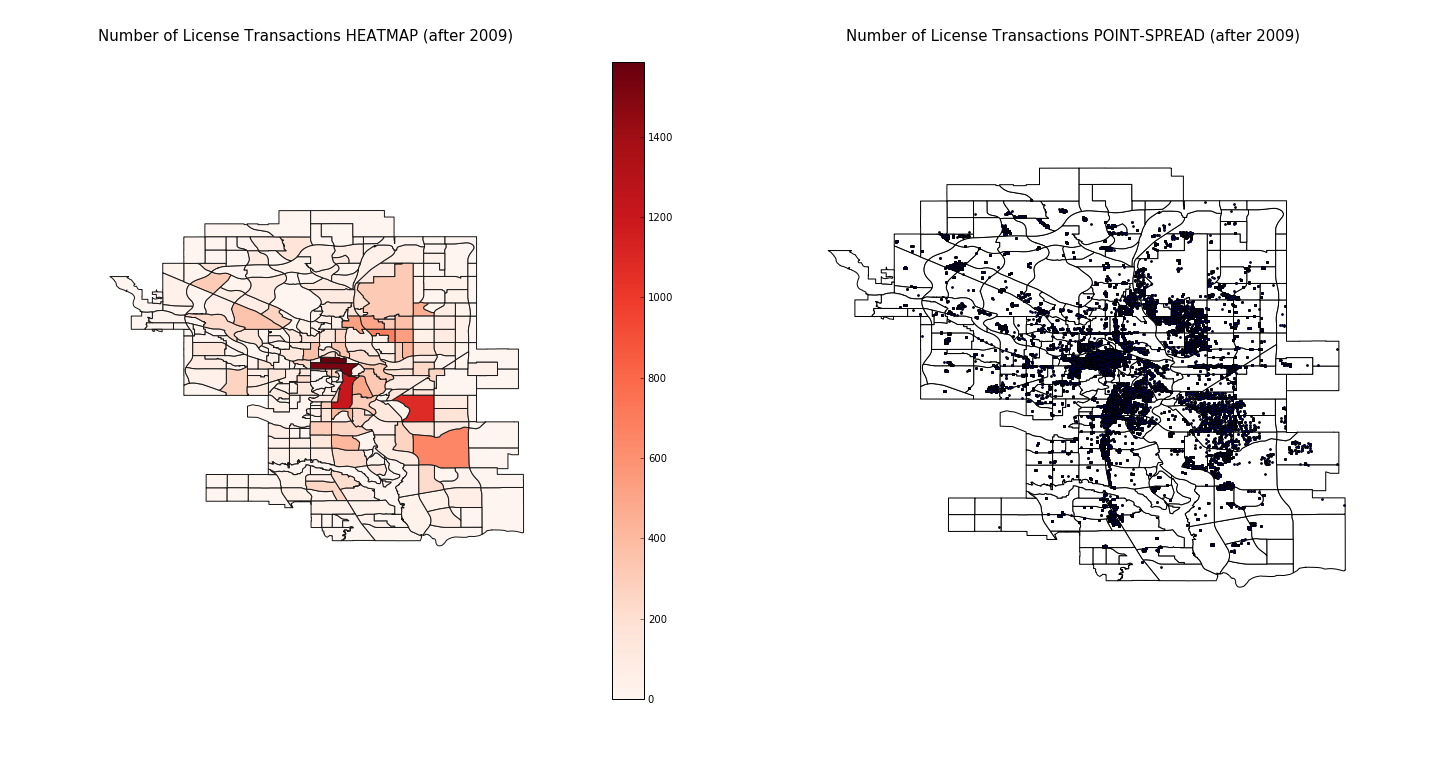

In [6]:
# The number of times each community name appears in the license data is the number of transactions in each comm.
lic['COMDISTNM'].value_counts()
ns = []
# Communities that have no license data (for whatever reason)
not_in_lic = []

for i,line in map_df.iterrows():
    community = line['name']
    # Number of times it appears in license data.
    try:
        n = lic['COMDISTNM'].value_counts()[community]
    except KeyError: # when there's a named community not shown in the license data.
        not_in_lic.append(community)
        n = 0
        pass
    ns.append(n)

# Create column.
map_df['N_transactions'] = ns
print('Number of communities in MAP but NOT in LICENCE data are: {}'.format(len(not_in_lic)))

# Figure and axes.
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=[20,10],sharex=True)

# Left plot: heatmap of number of transactions.
map_df.plot(ax=axes[0],column='N_transactions',cmap='Reds',edgecolor='0.1',legend=True)
axes[0].set_title('Number of License Transactions HEATMAP (after 2009)\n',fontsize=15)

# Right plot: point distribution of license transactions (plot map, then the points).
map_df.plot(ax=axes[1],color='white')
plt.scatter(lic['longitude'],lic['latitude'],s=3)
axes[1].set_title('Number of License Transactions POINT-SPREAD (after 2009)\n',fontsize=15)

# Rescale and turn off axes.
for ax in axes:
    ax.set(ylim=[50.75,51.3])
    ax.axis('off')

## Clean layout.
plt.tight_layout()
plt.subplots_adjust()

# Save fig.
savestring = 'transactions_heatmap.png'
plt.savefig('figs/' + savestring)